<a href="https://colab.research.google.com/github/varshitfauzdar/NLP_Assignments/blob/main/NLP_Lab3(word_normalization_techniques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 – Stemming and Lemmatization
**Course:** Natural Language Processing  
**Objective:** To understand and compare word normalization techniques used in NLP.

## Overview
In Natural Language Processing, the same word can appear in different forms.
Word normalization helps reduce this variation by converting words into a base form.

This assignment focuses on two important normalization techniques:
- **Stemming** – a rule-based approach that removes suffixes
- **Lemmatization** – a dictionary-based approach that produces meaningful base words


## Tasks Performed
### Q1: Stemming
- Applied **Porter Stemmer** and **Lancaster Stemmer** on a given list of words
- Compared the outputs to observe differences in aggressiveness and accuracy


In [6]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
words = ["running", "flies", "better", "studies", "fishing", "happiness"]

porter = PorterStemmer()
lancaster = LancasterStemmer()

print("Word\t\tPorter Stem\tLancaster Stem")
print("-"*40)

for word in words:
    print(f"{word}\t\t{porter.stem(word)}\t\t{lancaster.stem(word)}")


Word		Porter Stem	Lancaster Stem
----------------------------------------
running		run		run
flies		fli		fli
better		better		bet
studies		studi		study
fishing		fish		fish
happiness		happi		happy


### Q2: Lemmatization
- Performed lemmatization using:
  - **WordNet Lemmatizer**
  - **spaCy Lemmatizer**
- Compared results to understand context-aware lemmatization


In [3]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
words = ["leaves", "mice", "ran", "jumping", "children", "faster"]

lemmatizer = WordNetLemmatizer()

print("Word\t\tWordNet Lemma\tspaCy Lemma")
print("-"*45)

doc = nlp(" ".join(words))

for token in doc:
    print(f"{token.text}\t\t{lemmatizer.lemmatize(token.text)}\t\t{token.lemma_}")


Word		WordNet Lemma	spaCy Lemma
---------------------------------------------
leaves		leaf		leave
mice		mouse		mouse
ran		ran		run
jumping		jumping		jump
children		child		child
faster		faster		fast


### Q3: Loading a Large Text Dataset

In this step, a large text document is loaded from the NLTK Gutenberg corpus.
The Gutenberg corpus contains full-length books and is commonly used for NLP experiments.

The selected text (`austen-emma.txt`) is converted to lowercase and tokenized into words.
The total word count obtained here serves as the **baseline**, which will later be compared
with the word counts after applying stemming and lemmatization.


In [7]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

text = gutenberg.raw('austen-emma.txt')
words = nltk.word_tokenize(text.lower())

print("Original word count:", len(words))


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Original word count: 191851


In [8]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [porter.stem(w) for w in words if w.isalpha()]
lemmatized_words = [lemmatizer.lemmatize(w) for w in words if w.isalpha()]

print("After Stemming:", len(set(stemmed_words)))
print("After Lemmatization:", len(set(lemmatized_words)))


After Stemming: 4369
After Lemmatization: 6260


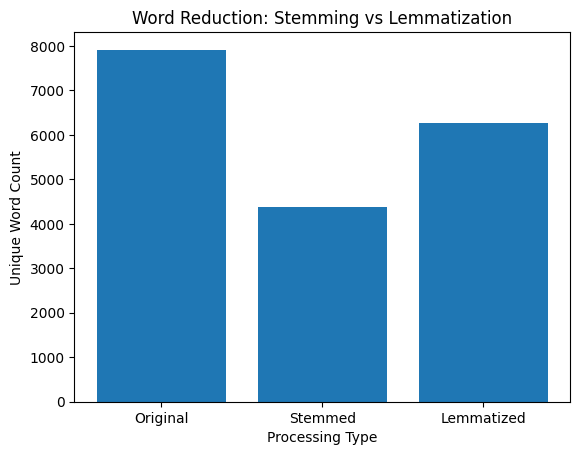

In [11]:
import matplotlib.pyplot as plt

labels = ['Original', 'Stemmed', 'Lemmatized']
counts = [
    len(set(words)),
    len(set(stemmed_words)),
    len(set(lemmatized_words))
]

plt.bar(labels, counts)
plt.xlabel("Processing Type")
plt.ylabel("Unique Word Count")
plt.title("Word Reduction: Stemming vs Lemmatization")
plt.show()


## Key Learnings
- Stemming is fast but may produce incorrect or incomplete words
- Lemmatization is slower but produces meaningful dictionary words
- Stemming reduces vocabulary more aggressively than lemmatization
- Proper text normalization improves NLP preprocessing pipelines


## Conclusion
This assignment demonstrates the importance of word normalization in NLP
and highlights the differences between stemming and lemmatization through
practical implementation and analysis.